In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler  
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
#Load and Explore the dataset
df=pd.read_csv("mushroom.csv")

In [16]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap_shape                 2000 non-null   int32
 1   cap_surface               2000 non-null   int32
 2   cap_color                 2000 non-null   int32
 3   bruises                   2000 non-null   int32
 4   odor                      2000 non-null   int32
 5   gill_attachment           2000 non-null   int32
 6   gill_spacing              2000 non-null   int32
 7   gill_size                 2000 non-null   int32
 8   gill_color                2000 non-null   int32
 9   stalk_shape               2000 non-null   int32
 10  stalk_root                2000 non-null   int32
 11  stalk_surface_above_ring  2000 non-null   int32
 12  stalk_surface_below_ring  2000 non-null   int32
 13  stalk_color_above_ring    2000 non-null   int32
 14  stalk_color_below_ring    2000 non-null 

In [18]:
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,916,190
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,128,750
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,537,281
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,234,829
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,895,484


In [19]:
df.isnull().sum()

cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

C:\Users\pujitha tummala\AppData\Local\Temp\ipykernel_51824\3346904920.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='class', palette='Set2')


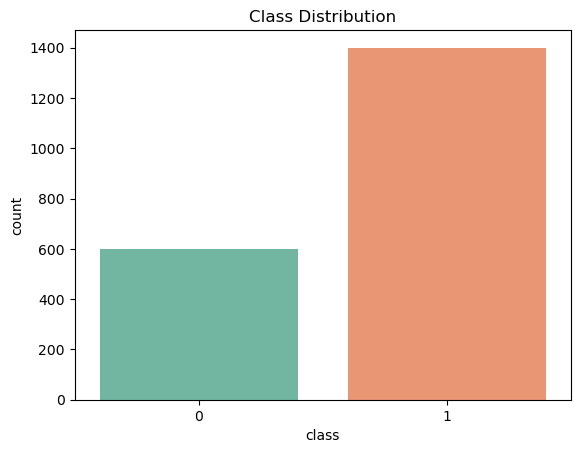

In [20]:
# EDA: Visualize Class Balance
sns.countplot(data=df, x='class', palette='Set2')
plt.title('Class Distribution')
plt.show()

In [21]:
# EDA: Feature Distributions for a few features
sample_features = ['cap_shape', 'cap_surface', 'cap_color', 'odor', 'gill_color']

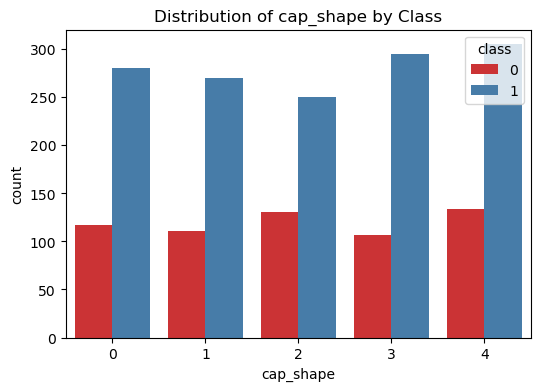

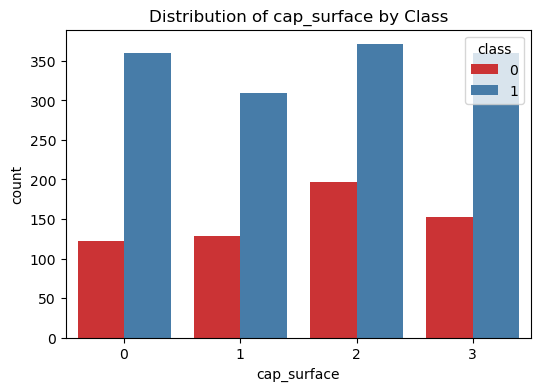

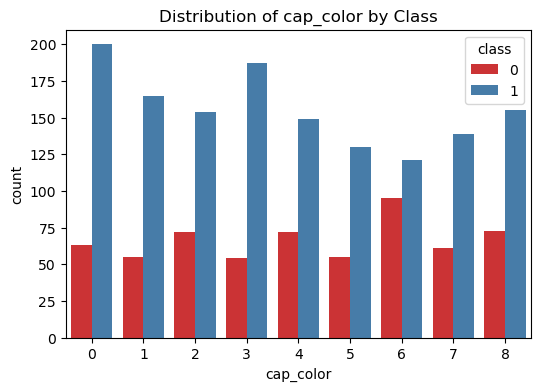

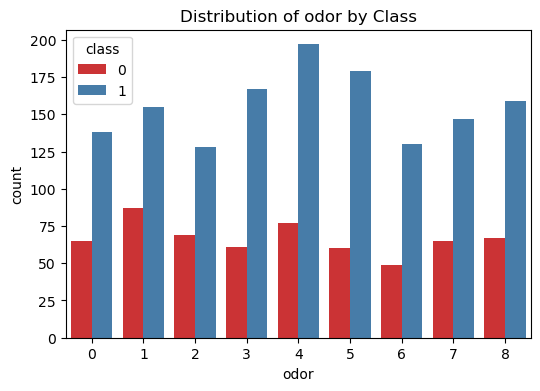

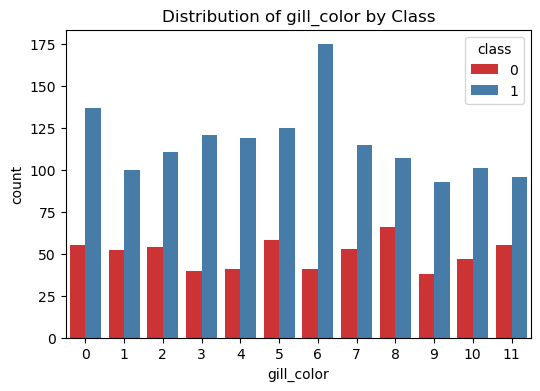

In [22]:
for col in sample_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='class', palette='Set1')
    plt.title(f'Distribution of {col} by Class')
    plt.show()

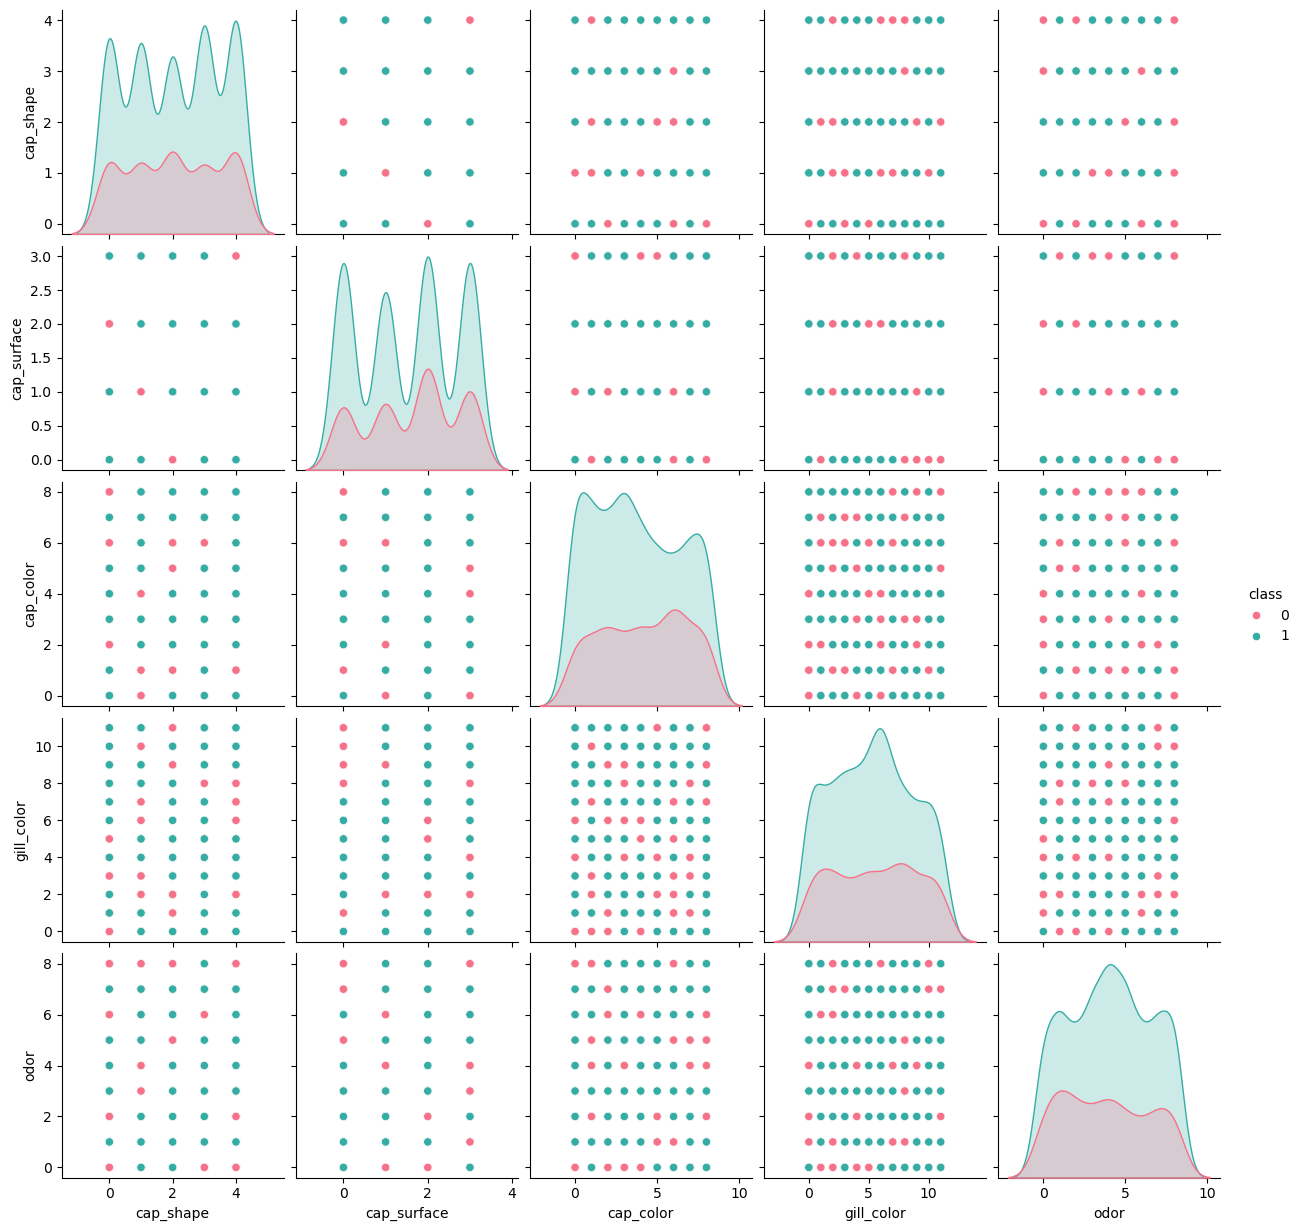

In [23]:
# Visualize Pairwise Relationships
features_for_plot = ['cap_shape', 'cap_surface', 'cap_color', 'gill_color', 'odor', 'class']
sns.pairplot(df[features_for_plot], hue='class', palette='husl')
plt.show()

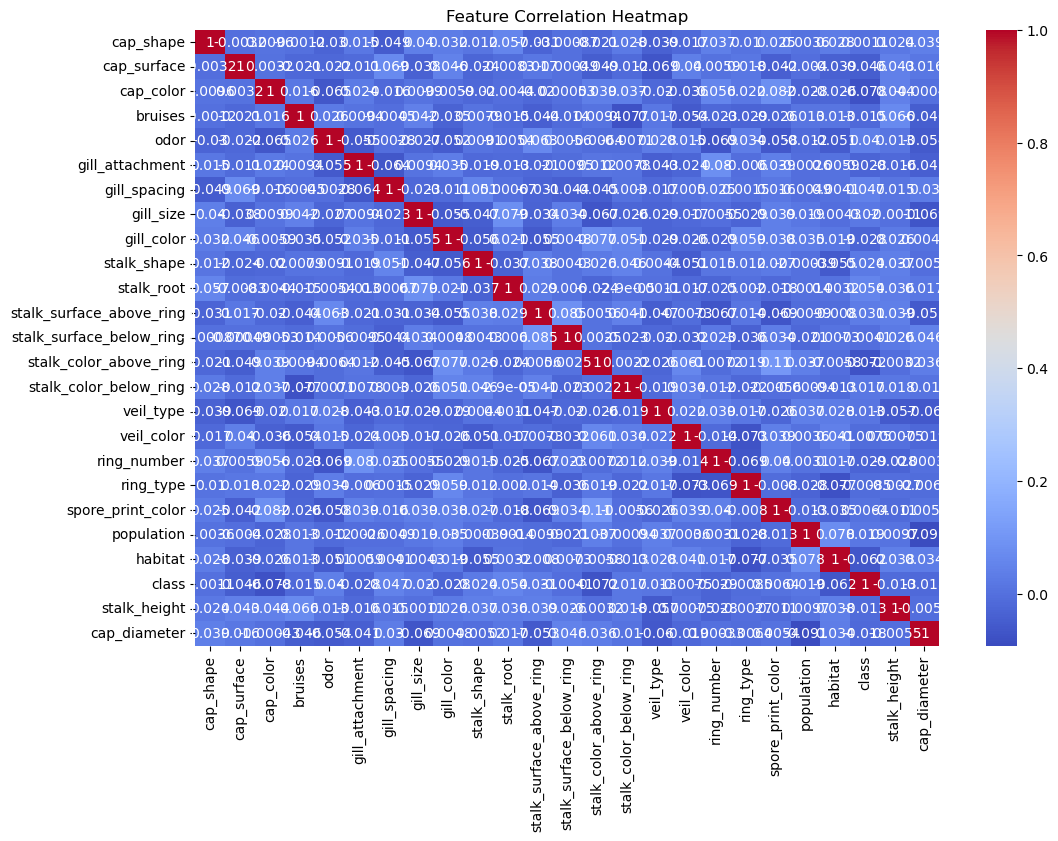

In [24]:
# Feature Correlation (only works for numeric columns)
# First, encode categorical variables temporarily to compute correlation
df_encoded_tmp = df.copy()
for col in df_encoded_tmp.columns:
    df_encoded_tmp[col] = LabelEncoder().fit_transform(df_encoded_tmp[col])
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded_tmp.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [25]:
# Data Preprocessing: Encode Categorical Features
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [26]:
# Split Data
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Feature Scaling (SVM benefits from scaled features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


💠 Training SVM with linear kernel:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



C:\Users\pujitha tummala\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pujitha tummala\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pujitha tummala\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


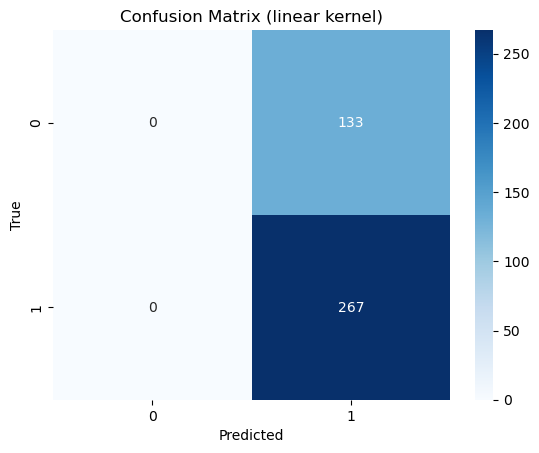


💠 Training SVM with rbf kernel:
              precision    recall  f1-score   support

           0       0.92      0.37      0.53       133
           1       0.76      0.99      0.86       267

    accuracy                           0.78       400
   macro avg       0.84      0.68      0.69       400
weighted avg       0.81      0.78      0.75       400



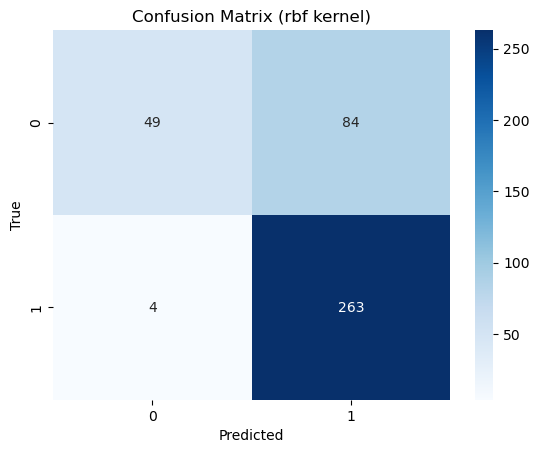


💠 Training SVM with poly kernel:
              precision    recall  f1-score   support

           0       0.87      0.55      0.67       133
           1       0.81      0.96      0.88       267

    accuracy                           0.82       400
   macro avg       0.84      0.75      0.78       400
weighted avg       0.83      0.82      0.81       400



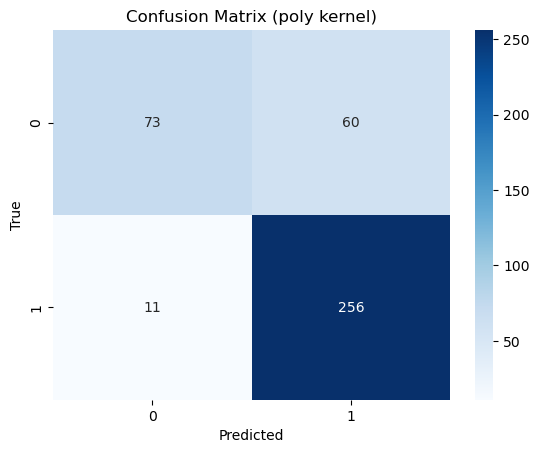

In [32]:
# SVM Implementation: Try different kernels
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    print(f"\n💠 Training SVM with {kernel} kernel:")
    model = SVC(kernel=kernel, C=1.0, gamma='scale')
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Performance Metrics
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix ({kernel} kernel)')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [33]:
# Final Observations
# SVM analysis complete! Choose kernel based on best precision/recall/F1.

In [35]:
# Practical Implications
# SVM is effective for mushroom classification with clean, balanced data. 
# RBF and polynomial kernels often capture non-linear decision boundaries, while linear kernel is faster but may underfit.